## Analysis of new wells

Our task is to decide where to drill a new well for GlavRosGosNeft.  
1. We will collect characteristics for wells: oil quality and volume of its reserves;  
2. Build a model to predict the volume of reserves in new wells;  
3. We'll make a choice of the well with the highest estimates of values;  
4. Determine the region with the maximum total profit of the selected wells.

Project contains the following sections:  
[1. General information](#1)  
[2. Training of model](#2)   
[3. Preparation for profit calculation](#3)  
[4. Profit calculation for selected wells and model predictions](#4)  
[5. Risk and profit analysis per region](#5)  
[6. Summary](#6)  

### <a id="1">1. General Information</a>

In [1]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats as st

In [2]:
df0=pd.read_csv('datasets/geo_data_0.csv')
df1=pd.read_csv('datasets/geo_data_1.csv')
df2=pd.read_csv('datasets/geo_data_2.csv')

In [3]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


- id — unique id of a well;  
- f0, f1, f2 — three features (these features are important);  
- product — volume of reserves in the well (thousand barrels).

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


There are no missing values. Data types are correct.

In [10]:
df0['region']='region0'
df1['region']='region1'
df2['region']='region2'

In [11]:
df=df0.append(df1)

In [12]:
df=df.append(df2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       300000 non-null  object 
 1   f0       300000 non-null  float64
 2   f1       300000 non-null  float64
 3   f2       300000 non-null  float64
 4   product  300000 non-null  float64
 5   region   300000 non-null  object 
dtypes: float64(4), object(2)
memory usage: 16.0+ MB


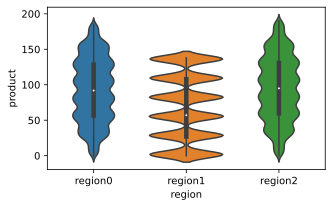

In [14]:
plt.figure(figsize = (5,3))
ax= sns.violinplot(x="region", y="product", data=df)
plt.show()

The distributions of the 0th and 2nd regions are similar.

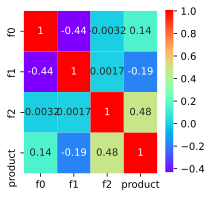

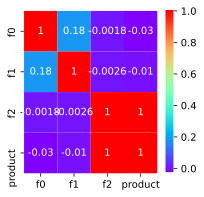

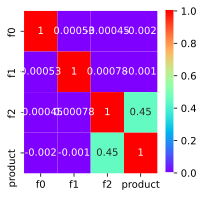

In [15]:
plt.figure(figsize = (3,3))
sns.heatmap(df0.corr(), annot = True, cmap="rainbow")
plt.show()
plt.figure(figsize = (3,3))
sns.heatmap(df1.corr(), annot = True, cmap="rainbow")
plt.show()
plt.figure(figsize = (3,3))
sns.heatmap(df2.corr(), annot = True, cmap="rainbow")
plt.show()

We can see that the f2 feature has a strong correlation with product.

### <a id="2">2. Training of model</a>

Only linear regression is suitable for training the model 

Creating a function to calculate mse, RMSE, R2_score, mean.

Increase in R2 (coefficient of determination; R-squared) means an increase in the quality of the model.

In [16]:
def LR(target_valid,predicted_valid):
    mse = mean_squared_error(target_valid, predicted_valid)
    r2 = r2_score(target_valid, predicted_valid)
    print("MSE =", mse)
    print("RMSE =", (mse ** 0.5))
    print("R2_score =", r2)
    print("mean =", predicted_valid.mean())

#### df0 - region 0

In [17]:
target0 = df0['product']
features0 = df0.drop(['id','product','region'] , axis=1)
features0_train, features0_valid, target0_train, target0_valid = train_test_split(
    features0, target0, test_size=0.25, random_state=12345)

In [18]:
len(features0_train)/len(df0),len(features0_valid)/len(df0)

(0.75, 0.25)

In [19]:
model = LinearRegression()
model.fit(features0_train, target0_train)
predicted_valid_0 = model.predict(features0_valid)
LR(target0_valid,predicted_valid_0)

MSE = 1412.2129364399243
RMSE = 37.5794217150813
R2_score = 0.27994321524487786
mean = 92.59256778438035


#### df1 - region 1

In [20]:
target1 = df1['product']
features1 = df1.drop(['id','product','region'] , axis=1)
features1_train, features1_valid, target1_train, target1_valid = train_test_split(
    features1, target1, test_size=0.25, random_state=12345)

In [21]:
model = LinearRegression()
model.fit(features1_train, target1_train)
predicted_valid_1 = model.predict(features1_valid)
LR(target1_valid,predicted_valid_1)

MSE = 0.797626336039118
RMSE = 0.8930992867756182
R2_score = 0.9996233978805127
mean = 68.728546895446


#### df2 - region 2

In [22]:
target2 = df2['product']
features2 = df2.drop(['id','product','region'] , axis=1)
features2_train, features2_valid, target2_train, target2_valid = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)

In [23]:
model = LinearRegression()
model.fit(features2_train, target2_train)
predicted_valid_2 = model.predict(features2_valid)
LR(target2_valid,predicted_valid_2)

MSE = 1602.377581323619
RMSE = 40.02970873393434
R2_score = 0.20524758386040465
mean = 94.96504596800489


Putting averages in one table for comparison

In [24]:
data = {'target_mean': [target0_valid.mean(), target1_valid.mean(),target2_valid.mean()],
        'predicted_mean': [predicted_valid_0.mean(), predicted_valid_1.mean(),predicted_valid_2.mean()],
        'RMSE': [mean_squared_error(target0_valid, predicted_valid_0)**0.5, mean_squared_error(target1_valid, predicted_valid_1)**0.5,
                 mean_squared_error(target2_valid, predicted_valid_2)**0.5],
        'R2-score': [r2_score(target0_valid, predicted_valid_0),r2_score(target1_valid, predicted_valid_1),r2_score(target2_valid, predicted_valid_2)],
        }
print(pd.DataFrame(data))

   target_mean  predicted_mean       RMSE  R2-score
0    92.078597       92.592568  37.579422  0.279943
1    68.723136       68.728547   0.893099  0.999623
2    94.884233       94.965046  40.029709  0.205248


Only region 1 shows good results, which are even too good and it is not clear whether this can be trusted. Regions 0 and 2 show poor results. At the same time, the predicted_mean in the 1st region is low.

### <a id="3">3. Preparation for profit calculation</a>

1. When exploring a region, 500 points are explored, from which, using ML, the best 200 are selected for development.
2. The budget for the development of wells in the region is 10 billion rubles.  
3. At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.  
4. After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, we need to choose the region with the highest average profit.  

All key values for calculations are stored in separate variables.

In [25]:
total_points=500
best_points=200
budget=10000000
income_per_barrel=450
unit=1000
threshold=2.5

Let's calculate a sufficient volume of raw materials for break-even development of a new well and compare the obtained volume of raw materials with the average stock in each region.

In [26]:
total_barrels=budget/income_per_barrel
print(total_barrels)

22222.222222222223


In [27]:
min_vol_per_loc=total_barrels/best_points
print(min_vol_per_loc)

111.11111111111111


111.1 is a sufficient volume of raw materials for the break-even development of a new well. The average stock of predicted raw materials is less, we got the results of 94.96, 68.73 and 92.59.

### <a id="4">4. Profit calculation for selected wells and model predictions</a>

Creating a function to calculate the profit for the selected wells and model predictions:
1. Let's choose wells with the maximum values of predictions.
2. Sum the target value of the volume of raw materials corresponding to these predictions.
3. Calculate the profit for the received volume of raw materials.

In [28]:
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (selected.sum()*450 - (budget))*1000

In [29]:
#region 0
predicted_valid_0=pd.Series(predicted_valid_0)
target0_valid=target0_valid.reset_index(drop=True)
profit(target0_valid, predicted_valid_0,200)/10**9

3.3208260431398506

In [30]:
#region 1
predicted_valid_1=pd.Series(predicted_valid_1)
target1_valid=target1_valid.reset_index(drop=True)
profit(target1_valid, predicted_valid_1,200)/10**9

2.4150866966815125

In [31]:
#region 2
predicted_valid_2=pd.Series(predicted_valid_2)
target2_valid=target2_valid.reset_index(drop=True)
profit(target2_valid, predicted_valid_2,200)/10**9

2.7103499635998327

### <a id="5">5. Risk and profit analysis per region</a>

First we apply the Bootstrap technique with 1000 samples to find the profit distribution. Then we find the average profit, 95% confidence interval and the risk of loss. Loss is negative profit.

In [32]:
state = np.random.RandomState(12345)
def bootstrap(target, predicted):
    values = []
    predicted=pd.Series(predicted)
    target=target.reset_index(drop=True)
    for i in range(1000):
        target_subsample = target.sample(total_points, random_state=state, replace=True)
        preds_subsample = predicted[target_subsample.index]
        values.append(profit(target_subsample, preds_subsample, best_points))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    confidence_interval = (lower, upper)
    mean_profit = values.mean()
    risk=(values<0).mean()*100
    return print("Средняя прибыль:", mean_profit/10**9),print("95%-й доверительный интервал",confidence_interval), print("риск составляет (%):",risk)

In [33]:
bootstrap(target0_valid,predicted_valid_0)

Средняя прибыль: 0.42593852691059225
95%-й доверительный интервал (-102090094.83793722, 947976353.358369)
риск составляет (%): 6.0


(None, None, None)

In [34]:
bootstrap(target1_valid,predicted_valid_1)

Средняя прибыль: 0.5182594936973247
95%-й доверительный интервал (128123231.43308419, 953612982.0669086)
риск составляет (%): 0.3


(None, None, None)

In [35]:
bootstrap(target2_valid,predicted_valid_2)

Средняя прибыль: 0.4201940053440501
95%-й доверительный интервал (-115852609.16001163, 989629939.844574)
риск составляет (%): 6.2


(None, None, None)

The first region shows the highest average profit and the lowest risk for well development. Zero and second solutions have a risk of more than 6%. The model for the first region also showed the best results. To make a final decision, additional analyzes should be carried out, as the model showed too good results.

### <a id="6">6. Summary</a>

Our task was to decide where to drill a new well for GlavRosGosNeft.  
1. We studied the exploration of three regions and checked the data.  
2. We trained and tested a linear regression model for each of the regions.  
3. Next, we ran the Bootstrap procedure and found the average return, 95% confidence interval, and risk of loss.  

As a result, we chose the first region (/datasets/geo_data_1.csv), where we found the highest average profit and the lowest risk for well development.